## Content-based Filtering - Simple

In [3]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Step 1. Prepare the Data

In [4]:
## Case : ada 3 kelas di SA ; WM,DM,DS.

doc_WM = 'In this class, we are going to build dinamic website and mobile apps'
doc_DM = 'In this class, we are going to promote product to segmented market'
doc_DS = 'In this class, we are going to build recommender system'

documents = [doc_WM,doc_DM, doc_DS]

In [5]:
documents

['In this class, we are going to build dinamic website and mobile apps',
 'In this class, we are going to promote product to segmented market',
 'In this class, we are going to build recommender system']

### Step 2. Use CountVectorizer

In [6]:
count_vectorizer = CountVectorizer(stop_words='english')

matrix = count_vectorizer.fit_transform(documents)

In [17]:
matrix

<3x12 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [10]:
count_vectorizer.get_feature_names()

['apps',
 'build',
 'class',
 'dinamic',
 'going',
 'market',
 'mobile',
 'product',
 'promote',
 'recommender',
 'segmented',
 'website']

In [13]:
## Tambahan : Melihat kegunaan count vectorizer

doc_array = matrix.toarray()
df_mat = pd.DataFrame(doc_array, columns = count_vectorizer.get_feature_names(), index = ['doc_WM', 'doc_DM', 'doc_DS'])

In [14]:
df_mat

,apps,build,class,dinamic,going,market,mobile,product,promote,recommender,segmented,website
doc_WM,1,1,1,1,1,0,1,0,0,0,0,1
doc_DM,0,0,1,0,1,1,0,1,1,0,1,0
doc_DS,0,1,1,0,1,0,0,0,0,1,0,0


### Step 3 : Menghitung Cosine Similarity

In [38]:
import seaborn as sns


array([[1.        , 0.3086067 , 0.56694671],
       [0.3086067 , 1.        , 0.40824829],
       [0.56694671, 0.40824829, 1.        ]])

<AxesSubplot:>

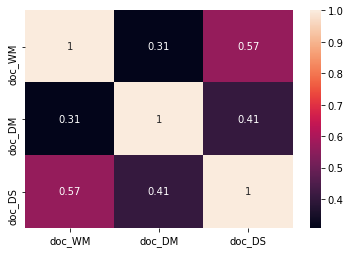

In [23]:
cscore = cosine_similarity(matrix)
sns.heatmap(cscore, annot=True, 
            xticklabels = df_mat.index,
           yticklabels = df_mat.index)

### Step 4 . Show the Recommendation

In [36]:
class_taken = int(input('What Class have you take? \n 0: WM \n 1: DM \n 2: DS \n'))
df_score = pd.DataFrame(cscore)
urutan_rec = list(df_score[class_taken].sort_values(ascending=False).index)[1:]
list_kelas = ['Web & Mobile', 'Digital Marketing', 'Data Science']

kelas_recom = []
for i in urutan_rec:
    kelas_recom.append(list_kelas[i])
    
print(f'Becaue you took {list_kelas[class_taken]} class, here are similar class for you')

for i in range(len(kelas_recom)):
    print(f'{i+1}, {kelas_recom[i]}')

What Class have you take? 
 0: WM 
 1: DM 
 2: DS 
1
Becaue you took Digital Marketing class, here are similar class for you
1, Data Science
2, Web & Mobile


### Contoh 2 : Simple Music Recommendation

In [48]:
df  = pd.DataFrame({'title': [('Song_'+str(i)) for i in range (0,10)], 
                    'genre': ['pop','jazz', 'dangdut',
                              'pop','jazz', 'dangdut',
                              'pop', 'jazz','dangdut','pop']})


In [49]:
cv = CountVectorizer()
genre = cv.fit_transform(df['genre'])

In [50]:
cv.get_feature_names()

['dangdut', 'jazz', 'pop']

<AxesSubplot:>

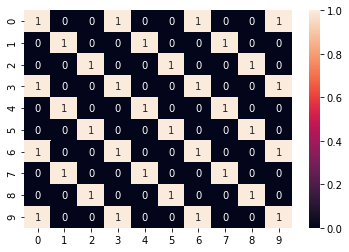

In [54]:
coScore = cosine_similarity(genre)
sns.heatmap(coScore,annot=True)

In [56]:
genre.toarray()

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

In [59]:
music = int(input('What msuic have you heard?'))
df_score = pd.DataFrame(coScore)
urutan_rec = list(df_score[music].sort_values(ascending=False).drop(music).index)
list_music = list(df['title'].values)
music_recom = []
for i in urutan_rec:
    music_recom.append(list_music[:4])
    
print(f'Becaue you took {list_music[music]} class, here are similar songs for you')

for i in range(len(music_recom[:3])):
    print(f'{i+1}, {music_recom[i]}')

What msuic have you heard?0
Becaue you took Song_0 class, here are similar songs for you
1, ['Song_0', 'Song_1', 'Song_2', 'Song_3']
2, ['Song_0', 'Song_1', 'Song_2', 'Song_3']
3, ['Song_0', 'Song_1', 'Song_2', 'Song_3']


In [61]:
anime = pd.read_csv(r'C:\Users\Ramadhoni\Documents\Bootcamp Data Scientist\Machine Learning\Recomend System\anime.csv')

In [62]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [64]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [65]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [66]:
df.shape

(10, 2)

In [67]:
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [68]:
anime_notnull = anime.dropna()

In [69]:
anime_notnull.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [70]:
anime_notnull

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [76]:
cv = CountVectorizer(tokenizer = lambda x : x.split(', '))
by_genre = cv.fit_transform(anime_notnull['genre'])

In [77]:
print(len(cv.get_feature_names()))
print(cv.get_feature_names())

43
['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai', 'historical', 'horror', 'josei', 'kids', 'magic', 'martial arts', 'mecha', 'military', 'music', 'mystery', 'parody', 'police', 'psychological', 'romance', 'samurai', 'school', 'sci-fi', 'seinen', 'shoujo', 'shoujo ai', 'shounen', 'shounen ai', 'slice of life', 'space', 'sports', 'super power', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri']


In [78]:
coScore_anime = cosine_similarity(by_genre)

In [153]:
df_score = pd.DataFrame(coScore_anime)
df_score

,0,1,2,3,4,5,6,7,8,9,...,12007,12008,12009,12010,12011,12012,12013,12014,12015,12016
0,1.000000,0.188982,0.000000,0.000000,0.000000,0.447214,0.000000,0.250000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.188982,1.000000,0.285714,0.000000,0.285714,0.338062,0.566947,0.377964,0.285714,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.285714,1.000000,0.267261,1.000000,0.338062,0.377964,0.188982,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.267261,1.000000,0.267261,0.000000,0.000000,0.353553,0.267261,0.267261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.285714,1.000000,0.267261,1.000000,0.338062,0.377964,0.188982,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
12013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
12014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
12015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [158]:
anime_liked = input('What anime do you like? ')
new_anime = anime_notnull.reset_index()
index_liked = new_anime[new_anime['name']==anime_liked].index
df_score = pd.DataFrame(coScore_anime)
urutan_rec = list(df_score[index_liked[0]].sort_values(ascending=False).drop(index_liked[0]).index)
list_anime = list(new_anime['name'].values)

anime_recom = []
for i in urutan_rec :
    anime_recom.append(list_anime[i])
    
print(f'because you like {anime_liked}, here are similar anime just for you!')
for i in range(len(anime_recom[:10])):
    print(f"{i+1}. {anime_recom[i]} (Genre: {new_anime.loc[urutan_rec[i], 'genre']})")


What anime do you like? Naruto
because you like Naruto, here are similar anime just for you!
1. Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
2. Naruto: Shippuuden Movie 4 - The Lost Tower (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
3. Naruto Shippuuden: Sunny Side Battle (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
4. Naruto x UT (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
5. Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!! (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
6. Naruto: Shippuuden (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
7. Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
8. Boruto: Naruto the Movie (Genre: Action, Comedy, Martial Arts, Shounen, Super Power)
9. Katekyo Hitman Reborn! (Genre: Action, Comedy, Shounen, Super Power)
10. Kyutai

In [96]:
index_liked[0]

841

In [99]:
df = pd.read_csv(r'C:\Users\Ramadhoni\Documents\Bootcamp Data Scientist\Machine Learning\Recomend System\file.tsv', 
                 sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
df 

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [100]:
movie_id = pd.read_csv(r'C:\Users\Ramadhoni\Documents\Bootcamp Data Scientist\Machine Learning\Recomend System\Movie_Id_Titles.csv')
movie_id

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [101]:
data = pd.merge(df,movie_id, on='item_id')

In [102]:
data

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [103]:
data.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

### Step 1 : Create Pivot Table : User X Product

In [105]:
moviemat = data.pivot_table(index='user_id', columns= 'title', values='rating').fillna(0)
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 2 : Calculate Correlation

In [107]:
data['title'].unique()

array(['Star Wars (1977)', 'Empire Strikes Back, The (1980)',
       'Gone with the Wind (1939)', ..., 'Girls Town (1996)',
       'Silence of the Palace, The (Saimt el Qusur) (1994)',
       'Dadetown (1995)'], dtype=object)

In [108]:
liked_movies = 'Star Wars (1977)'
liked_movie_rating = moviemat[liked_movies]
liked_movie_rating

user_id
0      5.0
1      5.0
2      5.0
3      0.0
4      5.0
      ... 
939    0.0
940    4.0
941    0.0
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [111]:
similar_movie = moviemat.corrwith(liked_movie_rating)


,correlation
title,
'Til There Was You (1997),-0.009011
1-900 (1994),-0.009067
101 Dalmatians (1996),0.155314
12 Angry Men (1957),0.212583
187 (1997),-0.034787
...,...
Young Guns II (1990),0.137382
"Young Poisoner's Handbook, The (1995)",-0.002939
Zeus and Roxanne (1997),-0.007807


In [116]:
df_movie_corr = pd.DataFrame(similar_movie, columns=['correlation'])
movie_recom = df_movie_corr.sort_values(by='correlation', ascending=False).iloc[1:].head(10)
movie_recom

,correlation
title,
Return of the Jedi (1983),0.746797
"Empire Strikes Back, The (1980)",0.555233
Raiders of the Lost Ark (1981),0.540455
Indiana Jones and the Last Crusade (1989),0.467523
Toy Story (1995),0.456219
"Terminator, The (1984)",0.437866
Back to the Future (1985),0.419493
Alien (1979),0.412516
"Princess Bride, The (1987)",0.411505


In [118]:
def find_me_movie(liked_movies, n_recom):
    liked_movie_rating = moviemat[liked_movies]
    similar_movie = moviemat.corrwith(liked_movie_rating)
    df_movie_corr = pd.DataFrame(similar_movie,columns=['correlation'])
    movie_recom = df_movie_corr.sort_values(by='correlation', ascending=False).iloc[1:].head(n_recom)
    
    n=1
    for i in movie_recom.index:
        print(f'{n}. {i}')
        n+=1

In [123]:
def find_me_movie(liked_movies, n_recom):
    """
    function to find similar movies using collaborative filtering
    """
    liked_movie_rating = moviemat[liked_movies]
    similar_movie = moviemat.corrwith(liked_movie_rating)
    df_movie_corr = pd.DataFrame(similar_movie, columns=['correlation'])
    movie_recom = df_movie_corr.sort_values(by='correlation', ascending=False).iloc[1:].head(n_recom)
    print(f"People who like '{liked_movies}' also like : ")
    n=1
    for i in movie_recom.index:
        print(f'{n}. {i}')
        n+=1


In [124]:
find_me_movie(liked_movies= 'Toy Story (1995)', n_recom=10)

People who like 'Toy Story (1995)' also like : 
1. Star Wars (1977)
2. Independence Day (ID4) (1996)
3. Rock, The (1996)
4. Willy Wonka and the Chocolate Factory (1971)
5. Return of the Jedi (1983)
6. Mission: Impossible (1996)
7. Aladdin (1992)
8. Twister (1996)
9. Star Trek: First Contact (1996)
10. Beauty and the Beast (1991)


In [135]:
anime_rating = pd.read_csv(r'C:\Users\Ramadhoni\Documents\Bootcamp Data Scientist\Machine Learning\Recomend System\rating.csv')

In [185]:
anime = anime.head(850)

In [177]:
anime_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [178]:
anime_all = pd.merge(anime, anime_rating, on = 'anime_id' )

In [179]:
anime_all = anime_all.drop('rating_x', axis= 1)

In [180]:
anime_all

,anime_id,name,genre,type,episodes,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,278,-1
...,...,...,...,...,...,...,...,...
3337693,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,242553,73490,10
3337694,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,242553,73491,10
3337695,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,242553,73495,7
3337696,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,242553,73500,9


In [181]:
anime_all.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
members     0
user_id     0
rating_y    0
dtype: int64

### SOAL :
1. Buat sistem rekomendasi dengan content based filtering berdasarkan Type
2. Buat sistem rekomendasi dengan content based filtering berdasarkan Genre & Type
3. Buat sistem rekomendasi dengan collaborative filtering berdasarkan rating anime nya.


No.1

In [ ]:
anime = anime.head(850)

In [182]:
anime_all['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [186]:
cv = CountVectorizer()
by_type= cv.fit_transform(anime['type'])

In [187]:
coScore_anime_type = cosine_similarity(by_type)
df_score_type = pd.DataFrame(coScore_anime_type)
df_score_type

,0,1,2,3,4,5,6,7,8,9,...,840,841,842,843,844,845,846,847,848,849
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
846,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
847,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [198]:
anime_liked_type = input('What anime do you like? ')
index_liked_type = anime[anime['name']==anime_liked_type].index
urutan_recom = list(df_score_type[index_liked_type[0]].sort_values(ascending=False).drop(index_liked_type[0]).index)
list_anime = list(anime['name'].values)

anime_recom = []
for i in urutan_recom :
    anime_recom.append(list_anime[i])
    
print(f'because you like {anime_liked_type}, here are similar anime just for you!')
for i in range(len(anime_recom[:10])):
    print(f"{i+1}. {anime_recom[i]} (Type: {anime.loc[urutan_recom[i], 'type']})")


What anime do you like? Kimi no Na wa.
because you like Kimi no Na wa., here are similar anime just for you!
1. Psycho-Pass Movie (Type: Movie)
2. Ghost in the Shell 2: Innocence (Type: Movie)
3. Gake no Ue no Ponyo (Type: Movie)
4. Mobile Suit Gundam Wing: Endless Waltz Movie (Type: Movie)
5. Hakuouki Movie 1: Kyoto Ranbu (Type: Movie)
6. Kotonoha no Niwa (Type: Movie)
7. Final Fantasy VII: Advent Children (Type: Movie)
8. Detective Conan Movie 12: Full Score of Fear (Type: Movie)
9. Detective Conan Movie 09: Strategy Above the Depths (Type: Movie)
10. Kyoukai no Kanata Movie: I&#039;ll Be Here - Mirai-hen (Type: Movie)


No.2

In [220]:
anime['genre_type'] = anime['genre'] + str(', ') + anime['type']

In [221]:
cv = CountVectorizer(tokenizer = lambda x : x.split(', '))
by_genre_type= cv.fit_transform(anime['genre_type'])
coScore_anime_genre_type = cosine_similarity(by_genre_type)
df_score_genre_type = pd.DataFrame(coScore_anime_genre_type)
df_score_genre_type

,0,1,2,3,4,5,6,7,8,9,...,840,841,842,843,844,845,846,847,848,849
0,1.000000,0.158114,0.000000,0.000000,0.000000,0.365148,0.000000,0.200000,0.158114,0.000000,...,0.365148,0.000000,0.000000,0.000000,0.000000,0.223607,0.316228,0.365148,0.000000,0.338062
1,0.158114,1.000000,0.375000,0.204124,0.375000,0.433013,0.632456,0.316228,0.250000,0.375000,...,0.288675,0.433013,0.204124,0.204124,0.144338,0.000000,0.500000,0.288675,0.000000,0.400892
2,0.000000,0.375000,1.000000,0.408248,1.000000,0.433013,0.474342,0.158114,0.875000,1.000000,...,0.144338,0.577350,0.408248,0.204124,0.433013,0.176777,0.250000,0.433013,0.204124,0.267261
3,0.000000,0.204124,0.408248,1.000000,0.408248,0.235702,0.258199,0.258199,0.204124,0.408248,...,0.235702,0.235702,0.333333,0.000000,0.235702,0.000000,0.204124,0.235702,0.000000,0.218218
4,0.000000,0.375000,1.000000,0.408248,1.000000,0.433013,0.474342,0.158114,0.875000,1.000000,...,0.144338,0.577350,0.408248,0.204124,0.433013,0.176777,0.250000,0.433013,0.204124,0.267261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0.223607,0.000000,0.176777,0.000000,0.176777,0.408248,0.223607,0.223607,0.176777,0.176777,...,0.000000,0.408248,0.288675,0.288675,0.408248,1.000000,0.000000,0.000000,0.288675,0.188982
846,0.316228,0.500000,0.250000,0.204124,0.250000,0.288675,0.316228,0.316228,0.125000,0.250000,...,0.288675,0.288675,0.204124,0.000000,0.144338,0.000000,1.000000,0.433013,0.000000,0.267261
847,0.365148,0.288675,0.433013,0.235702,0.433013,0.166667,0.365148,0.000000,0.288675,0.433013,...,0.000000,0.333333,0.235702,0.000000,0.166667,0.000000,0.433013,1.000000,0.000000,0.308607
848,0.000000,0.000000,0.204124,0.000000,0.204124,0.471405,0.000000,0.000000,0.204124,0.204124,...,0.000000,0.235702,0.333333,0.000000,0.235702,0.288675,0.000000,0.000000,1.000000,0.218218


In [222]:
print(len(cv.get_feature_names()))
print(cv.get_feature_names())

45
['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama', 'ecchi', 'fantasy', 'game', 'harem', 'historical', 'horror', 'josei', 'kids', 'magic', 'martial arts', 'mecha', 'military', 'movie', 'music', 'mystery', 'ona', 'ova', 'parody', 'police', 'psychological', 'romance', 'samurai', 'school', 'sci-fi', 'seinen', 'shoujo', 'shoujo ai', 'shounen', 'shounen ai', 'slice of life', 'space', 'special', 'sports', 'super power', 'supernatural', 'thriller', 'tv', 'vampire']


In [223]:
anime_liked_genre_type = input('What anime do you like? ')
index_liked_genre_type = anime[anime['name']==anime_liked_genre_type].index
urutan_recom_genre_type = list(df_score_genre_type[index_liked_genre_type[0]].sort_values(ascending=False).drop(index_liked_genre_type[0]).index)
list_anime = list(anime['name'].values)

anime_recom_genre_type = []
for i in urutan_recom_genre_type :
    anime_recom_genre_type.append(list_anime[i])
    
print(f'because you like {anime_liked_genre_type}, here are similar anime just for you!')
for i in range(len(anime_recom_genre_type[:10])):
    print(f"{i+1}. {anime_recom_genre_type[i]} (Type: {anime.loc[urutan_recom_genre_type[i], 'type']}) ((Genre: {anime.loc[urutan_recom_genre_type[i], 'genre']}))")


What anime do you like? Naruto
because you like Naruto, here are similar anime just for you!
1. Naruto: Shippuuden (Type: TV) ((Genre: Action, Comedy, Martial Arts, Shounen, Super Power))
2. Katekyo Hitman Reborn! (Type: TV) ((Genre: Action, Comedy, Shounen, Super Power))
3. Dragon Ball Z (Type: TV) ((Genre: Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power))
4. Dragon Ball Kai (Type: TV) ((Genre: Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power))
5. Dragon Ball Kai (2014) (Type: TV) ((Genre: Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power))
6. Boku no Hero Academia (Type: TV) ((Genre: Action, Comedy, School, Shounen, Super Power))
7. Bleach (Type: TV) ((Genre: Action, Comedy, Shounen, Super Power, Supernatural))
8. Shijou Saikyou no Deshi Kenichi (Type: TV) ((Genre: Action, Comedy, Martial Arts, School, Shounen))
9. Boruto: Naruto the Movie (Type: Movie) ((Genre: Action, Comedy, Martial Arts, Shounen, Super Power))
10. 

In [224]:
anime_all

,anime_id,name,genre,type,episodes,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,278,-1
...,...,...,...,...,...,...,...,...
3337693,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,242553,73490,10
3337694,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,242553,73491,10
3337695,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,242553,73495,7
3337696,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,242553,73500,9


In [229]:
animemat = anime_all.pivot_table(index='user_id', columns='name', values='rating_y').fillna(0)


In [230]:
liked_anime = input('What anime title do you like? ')
liked_anime_ratings = animemat[liked_anime]
similar_anime_liked = animemat.corrwith(liked_anime_ratings)
df_anime_corr = pd.DataFrame(similar_anime_liked, columns=['correlation'])
best_recom = df_anime_corr.sort_values(by='correlation', ascending=False).iloc[1:].head(10)
print('People who like {} also like : '.format(liked_anime))
for i in range(len(best_recom.index)):
    print('{}. {} ({}% Match)'.format(i+1, best_recom.index[i], round(best_recom.loc[best_recom.index[i], :][0]*100), 2))


What anime title do you like? Naruto
People who like Naruto also like : 
1. Bleach (34% Match)
2. Death Note (30% Match)
3. Dragon Ball Z (29% Match)
4. Naruto: Shippuuden Movie 6 - Road to Ninja (28% Match)
5. Dragon Ball (27% Match)
6. Fairy Tail (27% Match)
7. Fullmetal Alchemist (27% Match)
8. Ao no Exorcist (26% Match)
9. Fullmetal Alchemist: Brotherhood (25% Match)
10. Soul Eater (25% Match)
